# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [626]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [627]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [628]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [629]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [630]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

CPU times: user 3.45 s, sys: 83.3 ms, total: 3.53 s
Wall time: 3.74 s
Train ROC-AUC 0.9991
Valid ROC-AUC 0.9136
Test ROC-AUC 0.8996


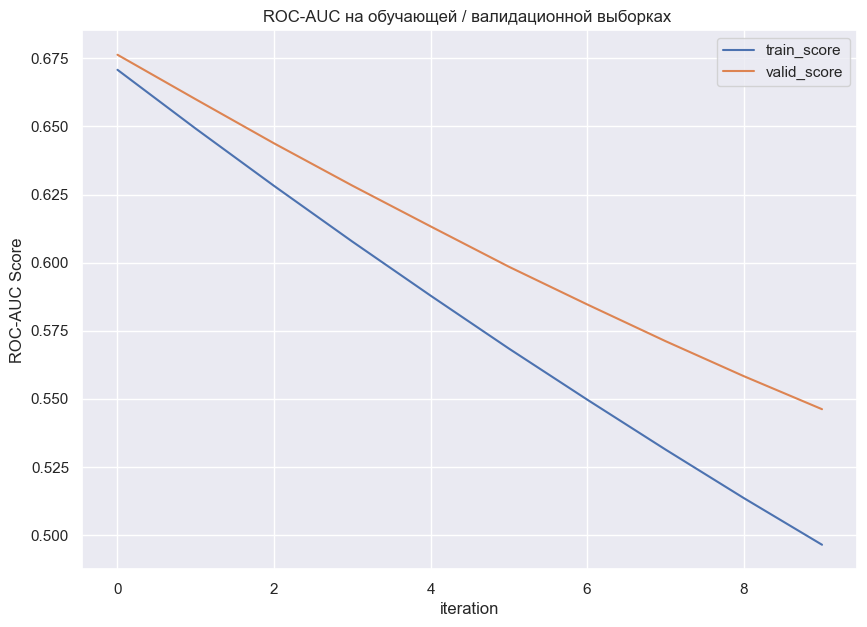

In [631]:
boosting = Boosting(plot=True)

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

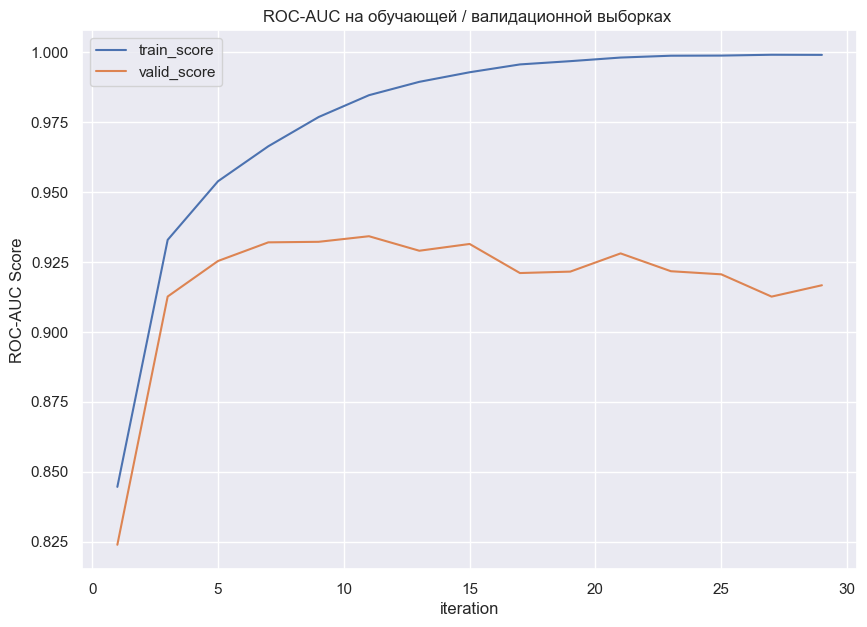

In [632]:
results_train = {}
results_valid = {}

depths = range(1, 30, 2)

for i in depths:

    boosting = Boosting({'max_depth':i})
    boosting.fit(x_train, y_train, x_valid, y_valid)

    results_train[i] = boosting.score(x_train, y_train)
    results_valid[i] = boosting.score(x_valid, y_valid)

plt.figure(figsize=(10,7))

plt.plot(results_train.keys(), results_train.values(), label='train_score')
plt.plot(results_valid.keys(), results_valid.values(), label='valid_score')
plt.xlabel('iteration')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC на обучающей / валидационной выборках ')
plt.legend();

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

> ## <div style='color:red'> Ответ: </div>
>
> #### На графике видно, что для тестовой выборки более переобученные деревья (базовые модели) увеличивают <code>ROC-AUC</code>, потому что базовые модели все больше подстраиваются под данные. Однако для валидационной выборки <code>ROC-AUC</code> растет до разумных пределов с увеличением глубины деревьев, а затем с какого-то момента начинает падать. Логично, что чем более переобученные деревья, тем больше сам градиентный бустинг подстраивается под данные и тем хуже он показывает себя на валидации

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [633]:
import optuna
from sklearn.metrics import roc_auc_score

optuna.logging.set_verbosity(optuna.logging.WARNING)

def usage_optuna(trial):

    params_boosting = {

        'learning_rate': trial.suggest_loguniform('learning_rate', 0.1, 1),
        'subsample': trial.suggest_float('subsample', 0.1, 1),
        'n_estimators': trial.suggest_int('n_estimators', 5, 13),
        'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 3, 7),
        'seed': 1

    }

    params_base_model = {

        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 10, 50)

    }

    boosting = Boosting(params_base_model, **params_boosting)

    boosting.fit(x_train, y_train, x_valid, y_valid)

    val_pred = boosting.predict_proba(x_valid)

    return roc_auc_score(y_valid, val_pred[:, 1])

study = optuna.create_study(direction='maximize')
study.optimize(usage_optuna, n_trials=100)

print(f'Best ROC-AUC: {study.best_trial.value}')

Best ROC-AUC: 0.9352559359467703


## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

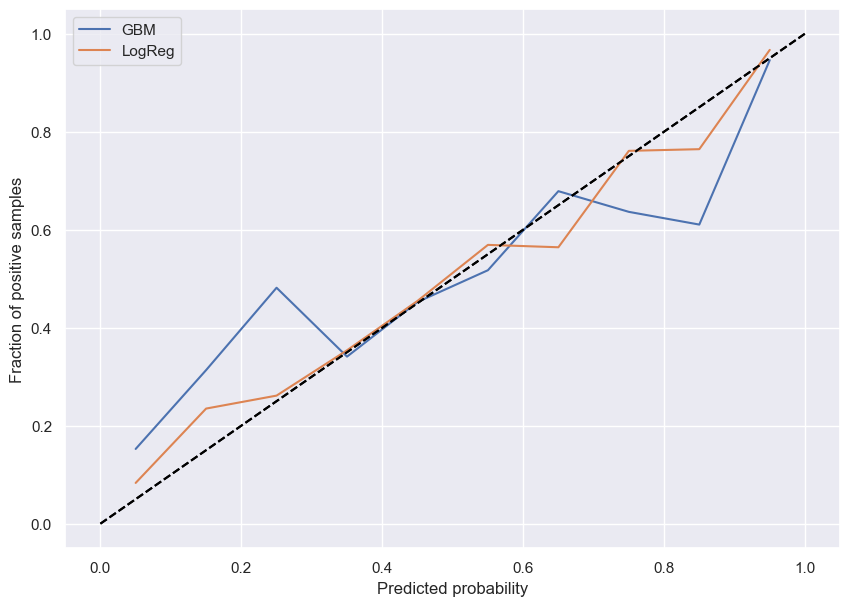

In [634]:
from sklearn.linear_model import LogisticRegression

def plot_calibration_curve(y_test, preds, ax=None, label = ''):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6, 6))

    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)

        bin_middle_points.append((l + r) / 2)

        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    ax.plot(bin_middle_points, bin_real_ratios, label=label)
    ax.plot([0,1], [0,1], linestyle='--', color='black')
    ax.set_ylim([-0.05, 1.05])
    ax.grid()

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

best_base_model_params = {key: study.best_trial.params[key] for key in ['max_depth', 'min_samples_leaf']}
best_boosting_params = {key: study.best_trial.params[key] for key in ['learning_rate', 'subsample', 'n_estimators', 'early_stopping_rounds']}

best_boosting = Boosting(best_base_model_params, **best_boosting_params)
log_reg = LogisticRegression().fit(x_train, y_train)

best_boosting.fit(x_train, y_train, x_valid, y_valid)

plot_calibration_curve(y_test, best_boosting.predict_proba(x_test)[:, 1], ax, 'GBM')
plot_calibration_curve(y_test, log_reg.predict_proba(x_test)[:, 1], ax, 'LogReg')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('Fraction of positive samples')
ax.legend();



> ## <div style='color:red'> Ответ: </div>
>
> #### На графике видно, что градиентный бустинг хуже откалиброван, чем логистическая регрессия. Это может быть связано со следующими вещами:
>
> * #### **Уверенность:** Известно, что логистическая регрессия стремится корректно предсказывать вероятность. Градиентный бустинг же старается максимизировать свою уверенность в предсказаниях, таким образом вероятности, которые выдает модель, могут быть некорректными
>
> * #### **Линейность:** Так как логистическая ргерессия из класса линейных моделей, то она менее подвержена переобучению и обладает меньшим разбросом алгоритма, поэтому и ее предсказания достаточно корректны. Градиентный бустинг же основан на решающих деревьях, которые подвережены переобучению и обладают большим разбросом, к тому же и выявляют нелинейные взаимосвязи. Поэтому градиентный бустинг может некорректно выдавать вероятности, тк сильно подвержен переобучению


Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

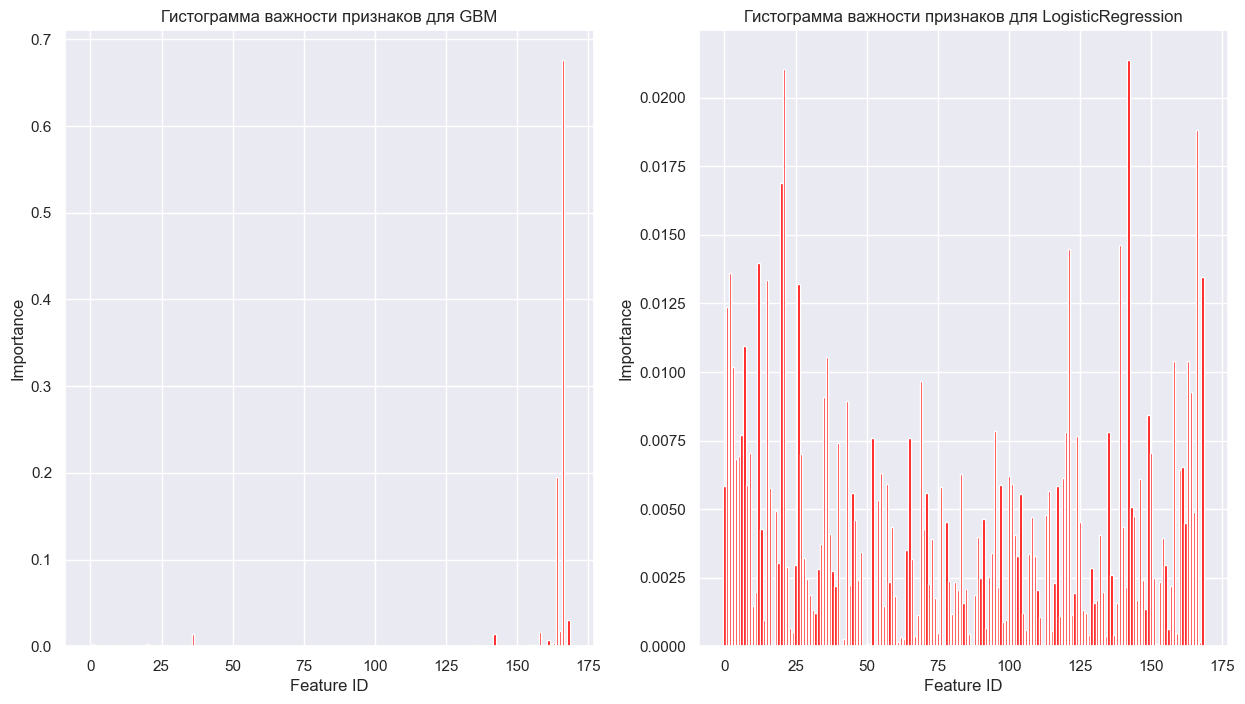

In [635]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].bar(np.arange(169), best_boosting.feature_importances_, color='red')
ax[0].set_xlabel('Feature ID')
ax[0].set_ylabel('Importance')
ax[0].set_title('Гистограмма важности признаков для GBM')

ax[1].bar(np.arange(169), abs(log_reg.coef_.ravel())/log_reg.coef_.ravel().shape[0], color='red')
ax[1].set_xlabel('Feature ID')
ax[1].set_ylabel('Importance')
ax[1].set_title('Гистограмма важности признаков для LogisticRegression');

> ## <div style='color:red'> Ответ: </div>
>
> #### **Логистическая регрессия**
>
> #### На графике видно, что все признаки имеют достаточно низкий вклад в предсказание модели. Однако модель старается использовать все предоставленные признаки
>
> #### **Градиентный бустинг**
>
> #### На графике выделяется лишь некотрая область признаков, которые полезны для модели. Возможно, в этой области находятся признаки, по которым можно сделать явное разбиение и для всех базовых моделей (решающих деревьев) этот признак оказался значимым для всех сгенерированных подвыборок

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [636]:
import pandas as pd

feats = pd.DataFrame(best_boosting.feature_importances_.ravel()).reset_index().rename(columns={'index':'feat'}).sort_values(0, ascending=False)
important_feats = feats[feats[0] >= feats[0].quantile(0.05)].feat.values

x_train, x_test, x_valid = pd.DataFrame(x_train.toarray()).reset_index().loc[:, important_feats], pd.DataFrame(x_test.toarray()).reset_index().loc[:, important_feats], pd.DataFrame(x_valid.toarray()).reset_index().loc[:, important_feats]


best_boosting = Boosting(best_base_model_params, **best_boosting_params)
best_boosting.fit(x_train.values, y_train, x_valid.values, y_valid)

print(f'ROC-AUC после фильтрации признаков: {best_boosting.score(x_test, y_test)}')

ROC-AUC после фильтрации признаков: 0.932990538840508


> ## <div style='color:red'> Ответ: </div>
>
> #### После фильтрации признаков (в данных остались только те признаки, у которых значение <code>feature_importance</code> больше 5% квантиля) качество незначительно ухудшилось, что может быть связано со следующими вещами 
>
> * #### **Гиперпараметры:** Так как используется тот же набор гиперпараметров, что и при обучении на полном наборе данных, то он может быть не релевантен для новой модели, что и ухудшило ее качество 
>
> * #### **Случайность:** Так как были удалены признаки даже с небольшим значением важности, это означает, что он был использован хотя бы раз, что и позволяло чуть-чуть повысить качество. Но такие признаки были удалены из данных, поэтому предыдущим деревьям пришлось искать иное разбиение

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [637]:
model_1 = log_reg.predict_proba(x_valid)
model_2 = best_boosting.predict_proba(x_valid)

best_weight = 0
best_roc_auc = 0

for w in np.arange(0,1,50):

    blend = w * model_1 + w*model_2

    roc_auc = roc_auc_score(y_valid, blend[:, 1])

    if roc_auc > best_roc_auc:

        best_roc_auc = roc_auc
        best_weight = w

best_blend = log_reg.predict_proba(x_test) * best_weight + (1 - best_weight) * best_boosting.predict_proba(x_test)
print(f'Лучший ROC-AUC после использования блендинга {roc_auc_score(y_test, best_blend[:, 1])}, оптимальное w: {best_weight}')

Лучший ROC-AUC после использования блендинга 0.932990538840508, оптимальное w: 0


#### Оказалось так, что блендинг здесь не помог, поэтому используем просто среднее предсказаний градиентного бустинга и логистической регрессии

In [638]:
mean_blend = log_reg.predict_proba(x_test) * 0.5 + 0.5 * best_boosting.predict_proba(x_test)

print(f'ROC-AUC после усреднения предсказаний градиентного бустинга и логистической регрессии: {roc_auc_score(y_test, mean_blend[:, 1])}')

ROC-AUC после усреднения предсказаний градиентного бустинга и логистической регрессии: 0.8834143150224445


> ## <div style='color:red'> Ответ: </div>
>
> #### Оказалось, что использовать блендинг для двух моделей (градиентный бустинг и логистическая регрессия) не улучшает качество. Получились так, что оптимальное значение веса, максимизирующего ROC-AUC, для предсказаний вероятности логистической регрессии оказался равным 0. Это связано с тем, что мы стараемся объеденить сильную модель с достаточно слабой, поэтому, возможно, лучше либо не использовать блендинг для данной задачи, либо найти достойную замену логистической регрессии

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [639]:
import catboost

from sklearn.metrics import roc_auc_score

catb = catboost.CatBoostClassifier(verbose=False)

catb.fit(x_train, y_train)

print(f'Train ROC-AUC {roc_auc_score(y_train, catb.predict_proba(x_train)[:,1])}')
print(f'Valid ROC-AUC {roc_auc_score(y_valid, catb.predict_proba(x_valid)[:, 1])}')
print(f'Test ROC-AUC {roc_auc_score(y_test, catb.predict_proba(x_test)[:, 1])}')

Train ROC-AUC 0.9847621519591385
Valid ROC-AUC 0.9475109611576324
Test ROC-AUC 0.9416825559773461


> ## <div style='color:red'> Ответ: </div>
>
> #### Очевидно, что <code>CatBoost</code> даст лучше результат, чем собственно написанный бустинг, поэтому он везде и используется. Но стоит отметить, что собственно написанный бустинг не сильно уступает: качества на тестовой выборке отличаются на $ \approx $ 0.1, что не может не радовать

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2024 года?